# WHAT IS YOUR HEART RATE TELLING YOU ?


# Heart disease and potential risk factors

Annually, countless individuals are diagnosed with various forms of heart disease, which stands as the leading cause of death for both genders across the globe, including in the United States. Through statistical studies, several factors contributing to the likelihood of developing heart disease have been pinpointed. These include but are not limited to age, blood pressure, cholesterol levels, diabetes, hypertension, genetic predisposition, obesity, and a sedentary lifestyle. In this project, I aim to apply statistical analyses and regression methodologies on the Cleveland heart disease dataset, focusing specifically on the relationship between the maximum heart rate achievable during physical activity and its correlation with an increased risk of heart disease.

## The Data
Available on `Cleveland_hd.csv`
| Column     | Type | Description              |
|------------|------|--------------------------|
|`age` | continuous | age in years | 
|`sex` | discrete | 0=female 1=male |
|`cp`| discrete | chest pain type: 1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptom |
|`trestbps`| continuous | resting blood pressure (in mm Hg) |
|`chol`| continuous | serum cholesterol in mg/dl |
|`fbs`| discrete | fasting blood sugar>120 mg/dl: 1=true 0=False |
|`restecg`| discrete | result of electrocardiogram while at rest are represented in 3 distinct values 0=Normal 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2=showing probable or definite left ventricular hypertrophy Estes' criteria (Nominal) |
|`thalach`| continuous | maximum heart rate achieved |
|`exang`| discrete | exercise induced angina: 1=yes 0=no |
|`oldpeak`| continuous | depression induced by exercise relative to rest |
|`slope`| discrete | the slope of the peak exercise segment: 1=up sloping 2=flat, 3=down sloping
|`ca`| continuous | number of major vessels colored by fluoroscopy that ranged between 0 and 3 |
|`thal`| discrete | 3=normal 6=fixed defect 7=reversible defect |
|`class`| discrete | diagnosis classes: 0=no presence 1=minor indicators for heart disease 2=>1 3=>2 4=major indicators for heart disease|

In [46]:
# Loading the necessary packages
install.packages("caret") #caret package for model building
library(caret)

# Reading the datasets Cleveland_hd.csv into hd_data
hd_data <- read.csv("Cleveland_hd.csv")

# taking a look at the first 5 rows of hd_data
head(hd_data, 5)

Installing caret [6.0-94] ...
	OK [linked cache]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Converting diagnosis class into outcome variable
We noticed that the outcome variable class has more than two levels. According to the codebook, any non-zero values can be coded as an "event." Let's create a new variable called hd to represent a binary 1/0 outcome.
There are a few other categorical/discrete variables in the dataset. Let's also convert sex into a 'factor' for next step analysis. Otherwise, R will treat this as continuous by default.


In [47]:
# Loading the tidyverse package
library(tidyverse)

# Recoding the 'hd' variable in hd_data
hd_data <- mutate(hd_data, hd = ifelse(class > 0, 1, 0))

# Recoding 'sex' as a factor and saving the result back to hd_data
hd_data <- mutate(hd_data, sex = factor(sex, levels = 0:1, labels = c("Female", "Male")))


# Identifying important clinical variables
Now, let's use statistical tests to see which predictors are related to heart disease. We can explore the associations for each variable in the dataset. Depending on the type of the data (i.e., continuous or categorical), we use t-test or chi-squared test to calculate the p-values.
Recall, t-test is used to determine whether there is a significant difference between the means of two groups (e.g., is the mean age from group A different from the mean age from group B?). A chi-squared test for independence compares the equivalence of two proportions.

In [48]:
# Does sex have an effect? Sex is a binary variable in this dataset,
# so the appropriate test is chi-squared test
hd_sex <- chisq.test(hd_data$sex, hd_data$hd)

# Since 22.043 is much greater than the critical value of 3.841,and the the p value is significantlly less than 0.05 ,  we can conclude that the observed association between sex and heart disease status is statistically significant.

# Does age have an effect? Age is continuous, so we use t-test here
hd_age <- t.test(hd_data$age ~ hd_data$hd)

#The t-test results indicate that there is a statistically significant difference in average age between individuals without heart disease (mean age = 52.59 years) and those with heart disease (mean age = 56.63 years), with a p-value of 7.061e-05, suggesting that age may have an effect on the likelihood of developing heart disease.

# What about thalach: maximum heart rate one can achieve during exercise?
hd_heartrate <- t.test(hd_data$thalach ~ hd_data$hd)

#The t-test results reveal a statistically significant difference in the maximum heart rate achieved during exercise between individuals without heart disease (mean = 158.38 bpm) and those with heart disease (mean = 139.26 bpm), with a p-value of 9.106e-14. This suggests that a higher maximum heart rate during exercise is associated with a lower likelihood of having heart disease.

# Print the results to see if p<0.05.
print(hd_sex)
print(hd_age)
print(hd_heartrate)


	Pearson's Chi-squared test with Yates' continuity correction

data:  hd_data$sex and hd_data$hd
X-squared = 22.043, df = 1, p-value = 2.667e-06


	Welch Two Sample t-test

data:  hd_data$age by hd_data$hd
t = -4.0303, df = 300.93, p-value = 7.061e-05
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -6.013385 -2.067682
sample estimates:
mean in group 0 mean in group 1 
       52.58537        56.62590 


	Welch Two Sample t-test

data:  hd_data$thalach by hd_data$hd
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 



# Exploring the associations graphically 
A good picture is worth a thousand words. In addition to p-values from statistical tests, we can plot the age, sex, and maximum heart rate distributions with respect to our outcome variable. This will give us a sense of both the direction and magnitude of the relationship.
First, let's plot age using a boxplot since it is a continuous variable.

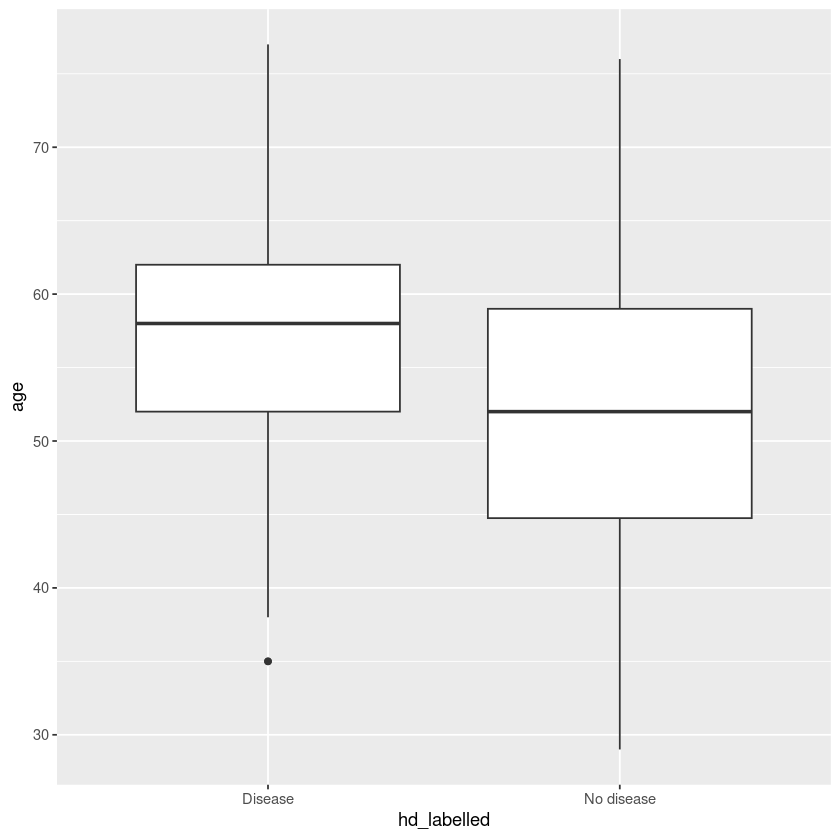

In [49]:
# Recoding hd to be labelled directly in the dataframe
hd_data$hd_labelled <- ifelse(hd_data$hd == 0, "No disease", "Disease")

# Plotting age vs hd using ggplot2
ggplot(data = hd_data, aes(x = hd_labelled, y = age)) + geom_boxplot()


# Explore the associations graphically 
Next, let's plot sex using a barplot since it is a binary variable in this dataset.

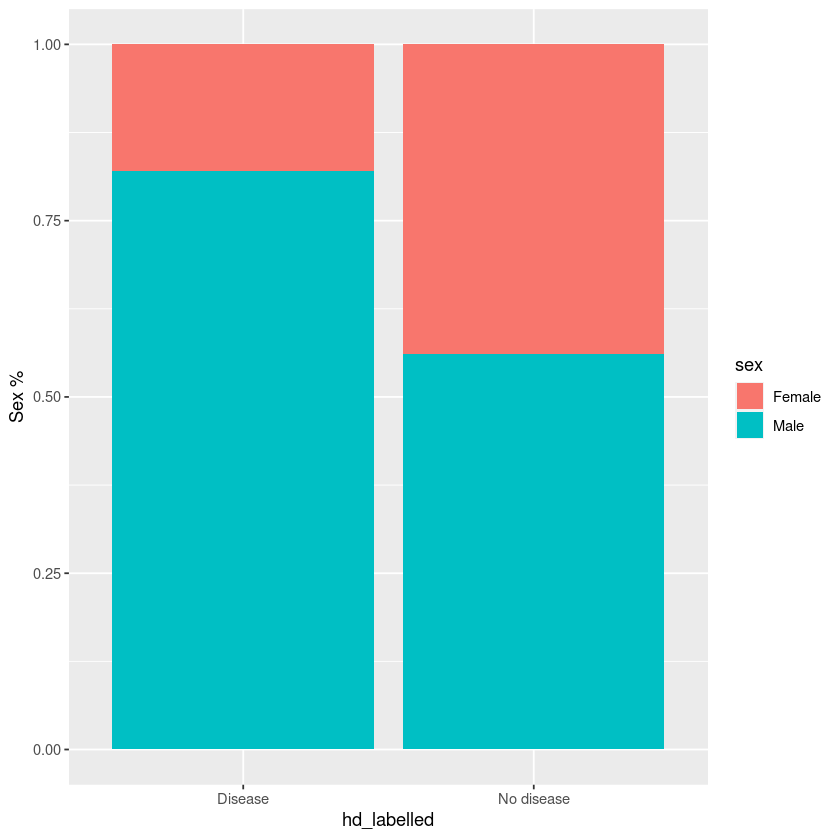

In [50]:
# sex vs hd
ggplot(data = hd_data, aes(x = hd_labelled, fill = sex)) + geom_bar(position = "fill") + ylab("Sex %")

# Explore the associations graphically 
And finally, let's plot thalach using a boxplot since it is a continuous variable.

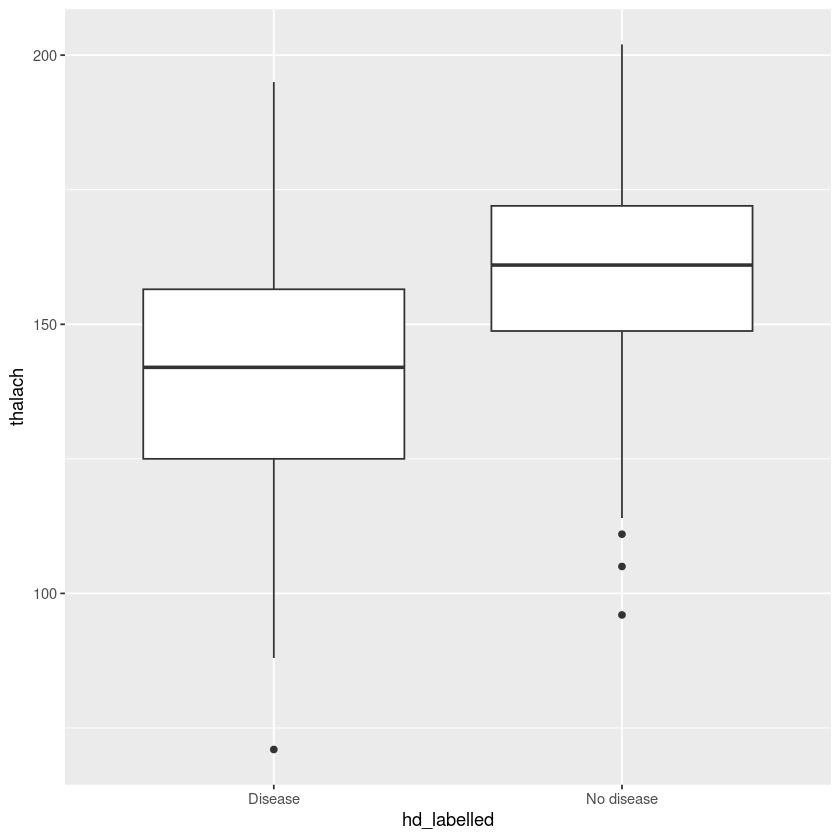

In [51]:
# max heart rate vs hd
ggplot(data = hd_data, aes(x = hd_labelled, y = thalach)) + geom_boxplot()

# Putting all three variables in one model
The plots and the statistical tests both confirmed that all the three variables are highly significantly associated with our outcome (p<0.001 for all tests).
In general, we want to use multiple logistic regression when we have one binary outcome variable and two or more predicting variables. The binary variable is the dependent (Y) variable; we are studying the effect that the independent (X) variables have on the probability of obtaining a particular value of the dependent variable. For example, we might want to know the effect that maximum heart rate, age, and sex have on the probability that a person will have a heart disease in the next year. The model will also tell us what the remaining effect of maximum heart rate is after we control or adjust for the effects of the other two effectors.
The glm() command is designed to perform generalized linear models (regressions) on binary outcome data, count data, probability data, proportion data, and many other data types. In our case, the outcome is binary following a binomial distribution.

In [52]:
# using the glm function from base R and specifying the family argument as binomial
model <- glm(data = hd_data, hd ~ age + sex + thalach, family = "binomial" )

# extracting the model summary
summary(model)


Call:
glm(formula = hd ~ age + sex + thalach, family = "binomial", 
    data = hd_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2250  -0.8486  -0.4570   0.9043   2.1156  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.111610   1.607466   1.936   0.0529 .  
age          0.031886   0.016440   1.940   0.0524 .  
sexMale      1.491902   0.307193   4.857 1.19e-06 ***
thalach     -0.040541   0.007073  -5.732 9.93e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 332.85  on 299  degrees of freedom
AIC: 340.85

Number of Fisher Scoring iterations: 4


# Extracting useful information from the model output
It's common practice in medical research to report Odds Ratio (OR) to quantify how strongly the presence or absence of property A is associated with the presence or absence of the outcome. When the OR is greater than 1, we say A is positively associated with outcome B (increases the Odds of having B). Otherwise, we say A is negatively associated with B (decreases the Odds of having B).
The raw glm coefficient table (the 'estimate' column in the printed output) in R represents the log(Odds Ratios) of the outcome. Therefore, we need to convert the values to the original OR scale and calculate the corresponding 95% Confidence Interval (CI) of the estimated Odds Ratios when reporting results from a logistic regression.

In [53]:
# load the broom package
library(broom)

# tidy up the coefficient table
tidy_m <- tidy(model)
tidy_m
#The model shows that being male significantly raises the outcome by 1.49 units, each year of age slightly increases it by 0.0319 units (borderline significant), and every unit increase in maximum heart rate during exercise decreases the outcome by 0.0405 units, with strong statistical significance.

# calculate OR
tidy_m$OR <- exp(tidy_m$estimate)

# calculate 95% CI and save as lower CI and upper CI
tidy_m$lower_CI <- exp(tidy_m$estimate - 1.96 * tidy_m$std.error)
tidy_m$upper_CI <- exp(tidy_m$estimate + 1.96 * tidy_m$std.error)

# display the updated coefficient table
tidy_m

#The model's analysis reveals that being male increases the odds of the outcome by 4.45 times (CI: 2.43 to 8.12), each additional year of age slightly raises the odds by 3% (CI: 0 to 7%), and each unit increase in maximum heart rate during exercise reduces the odds by 4% (CI: 2.6% to 5.3%), all with statistical significance.

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02
age,0.03188572,0.016439824,1.939541,5.243548e-02
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09


term,estimate,std.error,statistic,p.value,OR,lower_CI,upper_CI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02,22.4571817,0.9617280,524.3946593
age,0.03188572,0.016439824,1.939541,5.243548e-02,1.0323995,0.9996637,1.0662073
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06,4.4455437,2.4346539,8.1173174
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09,0.9602694,0.9470490,0.9736743


# Predicted probabilities from our model
So far, we have built a logistic regression model and examined the model coefficients/ORs. We may wonder how can we use this model we developed to predict a person's likelihood of having heart disease given his/her age, sex, and maximum heart rate. Furthermore, we'd like to translate the predicted probability into a decision rule for clinical use by defining a cutoff value on the probability scale. In practice, when an individual comes in for a health check-up, the doctor would like to know the predicted probability of heart disease, for specific values of the predictors: a 45-year-old female with a max heart rate of 150. To do that, we create a data frame called newdata, in which we include the desired values for our prediction.

In [54]:
# getting the predicted probability in our dataset using the predict() function
# Including the argument type=”response” in order to get our prediction.
pred_prob <- predict(model, hd_data, type="response")

# creating a decision rule using probability 0.5 as cutoff and saving the predicted decision into the main data frame
hd_data$pred_hd <- ifelse(pred_prob >= 0.5, 1, 0)

# creating a newdata data frame to save a new case information
newdata <- data.frame(age=45, sex="Female", thalach=150)

# predicting probability for this new case and printing out the predicted value
p_new <- predict(model, newdata, type="response")
p_new

1 
0.1773002

# Model performance metrics

Are the predictions accurate? How well does the model fit our data? We are going to use some common metrics to evaluate the model performance. The most straightforward one is Accuracy, which is the proportion of the total number of predictions that were correct. On the other hand, we can calculate the classification error rate using 1- accuracy. However, accuracy can be misleading when the response is rare (i.e., imbalanced response). Another popular metric, Area Under the ROC curve (AUC), has the advantage that it's independent of the change in the proportion of responders. AUC ranges from 0 to 1. The closer it gets to 1 the better the model performance. Lastly, a confusion matrix is an N X N matrix, where N is the level of outcome. For the problem at hand, we have N=2, and hence we get a 2 X 2 matrix. It cross-tabulates the predicted outcome levels against the true outcome levels.
After these metrics are calculated, we'll see (from the logistic regression OR table) that older age, being male and having a lower max heart rate are all risk factors for heart disease. We can also apply our model to predict the probability of having heart disease. For a 45 years old female who has a max heart rate of 150, our model generated a heart disease probability of 0.177 indicating low risk of heart disease. Although our model has an overall accuracy of 0.71, there are cases that were misclassified as shown in the confusion matrix.

In [55]:
# load Metrics package

library(Metrics)

# calculate auc, accuracy, clasification error
auc <- auc(hd_data$hd, hd_data$pred_hd) 
accuracy <- accuracy(hd_data$hd, hd_data$pred_hd)
classification_error <- ce(hd_data$hd, hd_data$pred_hd) 

# print out the metrics on to screen
print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

# confusion matrix
table(hd_data$hd, hd_data$pred_hd, dnn=c("True Status", "Predicted Status")) # confusion matrix

[1] "AUC= 0.706483593612915"
[1] "Accuracy= 0.70957095709571"
[1] "Classification Error= 0.29042904290429"


           Predicted Status
True Status   0   1
          0 122  42
          1  46  93